In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('Image/lena.bmp').convert('L')
img = np.array(img)

In [3]:
# 1. Design a function to compute an integral image (적분영상).

def integral(img):
    h,w = img.shape
    img = np.pad(img, ((1,0),(1,0)), 'constant', constant_values=0).astype('int32')
    
    # bottom-up 방식 구현
    for i in range(1,h+1):
        for j in range(1,w+1):
            img[i,j] = img[i,j] + img[i-1,j] + img[i,j-1] - img[i-1,j-1]   
        
    return img[1:,1:]

integral(img)

array([[     162,      324,      486, ...,    69646,    69801,    69929],
       [     324,      648,      972, ...,   139292,   139602,   139858],
       [     486,      972,     1458, ...,   208938,   209403,   209787],
       ...,
       [   48448,    96896,   145587, ..., 32265627, 32332046, 32398534],
       [   48492,    96984,   145730, ..., 32325207, 32391731, 32458327],
       [   48536,    97072,   145873, ..., 32384787, 32451416, 32518120]],
      dtype=int32)

In [83]:
cv2.integral(img)[1:,1:]

array([[     162,      324,      486, ...,    69646,    69801,    69929],
       [     324,      648,      972, ...,   139292,   139602,   139858],
       [     486,      972,     1458, ...,   208938,   209403,   209787],
       ...,
       [   48448,    96896,   145587, ..., 32265627, 32332046, 32398534],
       [   48492,    96984,   145730, ..., 32325207, 32391731, 32458327],
       [   48536,    97072,   145873, ..., 32384787, 32451416, 32518120]],
      dtype=int32)

array([[-2425., -1590.,  -785., ...,  1980.,  2690.,  3120.],
       [-2899., -1895.,  -933., ...,  2358.,  3125.,  3563.],
       [-3380., -2218., -1089., ...,  2641.,  3414.,  3856.],
       ...,
       [ -934.,  -673.,  -343., ...,  1099.,  1746.,  2369.],
       [ -771.,  -552.,  -286., ...,   942.,  1488.,  1999.],
       [ -623.,  -459.,  -239., ...,   771.,  1212.,  1632.]])

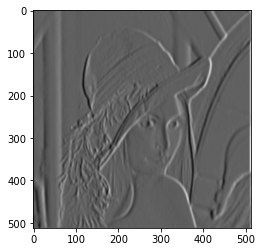

In [86]:
# 2. Design a filter with only addition and subtraction by using integral image.

filter1=[[1,1,1,1,-1,-1,-1,-1],
         [1,1,1,1,-1,-1,-1,-1],
         [1,1,1,1,-1,-1,-1,-1],
         [1,1,1,1,-1,-1,-1,-1],
         [1,1,1,1,-1,-1,-1,-1],
         [1,1,1,1,-1,-1,-1,-1],
         [1,1,1,1,-1,-1,-1,-1],
         [1,1,1,1,-1,-1,-1,-1]]

def integralFiltering1(img):
    h,w = img.shape
    result_img = np.zeros((h,w))
    img = np.pad(img, ((4,4),(4,4)), 'constant', constant_values=0)
    integral_img = integral(img)
    
    for i in range(4,h+4):
        for j in range(4,w+4):
            result_img[i-4,j-4] = integral_img[i+4,j] + integral_img[i-4,j-4] \
                                    - integral_img[i-4,j] - integral_img[i+4,j-4] \
                                        + (-1) * (integral_img[i+4,j+4] + integral_img[i-4,j] \
                                                - integral_img[i-4,j+4] - integral_img[i+4,j] )
    return result_img

#img = np.ones((10,10), dtype=np.uint8)
#print(img)
result = integralFiltering1(img)
plt.imshow(result, 'gray')
result

array([[-2427., -2898., -3387., ..., -2886., -2382., -1872.],
       [-1611., -1927., -2249., ..., -1700., -1383., -1067.],
       [ -794.,  -958., -1113., ...,  -303.,  -200.,  -112.],
       ...,
       [  500.,   609.,   709., ...,   993.,   848.,   701.],
       [  737.,   886.,  1036., ...,  1708.,  1444.,  1165.],
       [  977.,  1167.,  1367., ...,  2407.,  2032.,  1632.]])

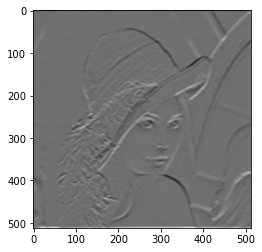

In [87]:
filter2=[[1,1,1,1,1,1,1,1],
         [1,1,1,1,1,1,1,1],
         [1,1,1,1,1,1,1,1],
         [1,1,1,1,1,1,1,1],
         [-1,-1,-1,-1,-1,-1,-1,-1],
         [-1,-1,-1,-1,-1,-1,-1,-1],
         [-1,-1,-1,-1,-1,-1,-1,-1],
         [-1,-1,-1,-1,-1,-1,-1,-1]]

def integralFiltering2(img):
    h,w = img.shape
    result_img = np.zeros((h,w))
    img = np.pad(img, ((4,4),(4,4)), 'constant', constant_values=0)
    integral_img = integral(img)
    
    for i in range(4,h+4):
        for j in range(4,w+4):
            result_img[i-4,j-4] = integral_img[i,j+4] + integral_img[i-4,j-4] \
                                    - integral_img[i,j-4] - integral_img[i-4,j+4] \
                                        + (-1) * (integral_img[i+4,j+4] + integral_img[i,j-4] \
                                                - integral_img[i,j+4] - integral_img[i+4,j-4] )
    return result_img

#img = np.ones((10,10), dtype=np.uint8)
#print(img)
result = integralFiltering2(img)
plt.imshow(result, 'gray')
result

array([[ 1455.,   954.,   471., ..., -1188., -1614., -1872.],
       [  959.,   623.,   305., ...,  -774.,  -973., -1067.],
       [  470.,   310.,   147., ...,  -265.,  -186.,  -112.],
       ...,
       [ -294.,  -197.,  -107., ...,   327.,   522.,   701.],
       [ -451.,  -314.,  -168., ...,   556.,   876.,  1165.],
       [ -623.,  -459.,  -239., ...,   771.,  1212.,  1632.]])

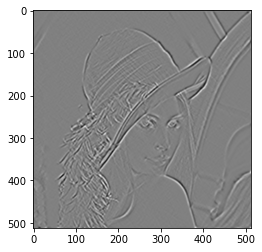

In [89]:
filter3=[[1,1,1,1,-1,-1,-1,-1],
         [1,1,1,1,-1,-1,-1,-1],
         [1,1,1,1,-1,-1,-1,-1],
         [1,1,1,1,-1,-1,-1,-1],
         [-1,-1,-1,-1,1,1,1,1],
         [-1,-1,-1,-1,1,1,1,1],
         [-1,-1,-1,-1,1,1,1,1],
         [-1,-1,-1,-1,1,1,1,1]]

def integralFiltering3(img):
    h,w = img.shape
    result_img = np.zeros((h,w))
    img = np.pad(img, ((4,4),(4,4)), 'constant', constant_values=0)
    integral_img = integral(img)
    
    for i in range(4,h+4):
        for j in range(4,w+4):
            result_img[i-4,j-4] = ( integral_img[i,j] + integral_img[i-4,j-4] \
                                     - integral_img[i-4,j] - integral_img[i,j-4] \
                                        + integral_img[i+4,j+4] + integral_img[i,j] \
                                            - integral_img[i,j+4] - integral_img[i+4,j] ) \
                                                 + (-1) * (integral_img[i,j+4] + integral_img[i-4,j] \
                                                            - integral_img[i,j] - integral_img[i-4,j+4] \
                                                               + integral_img[i+4,j] + integral_img[i,j-4] \
                                                                     - integral_img[i,j] - integral_img[i+4,j-4])
    return result_img

#img = np.ones((10,10), dtype=np.uint8)
#print(img)
result = integralFiltering3(img)
plt.imshow(result, 'gray')
result

array([[-3245., -4875., -4060., ..., -4550., -2825., -1125.],
       [-3901., -5837., -4854., ..., -5141., -3148., -1222.],
       [-4549., -6797., -5655., ..., -5493., -3346., -1295.],
       ...,
       [-1127., -1724., -1550., ..., -3638., -2410., -1186.],
       [ -927., -1422., -1280., ..., -3051., -2039., -1007.],
       [ -715., -1122., -1033., ..., -2489., -1664.,  -822.]])

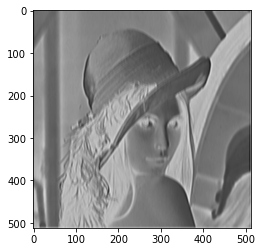

In [90]:
filter4=[[1,1,-2,-2,-2,-2,1,1],
         [1,1,-2,-2,-2,-2,1,1],
         [1,1,-2,-2,-2,-2,1,1],
         [1,1,-2,-2,-2,-2,1,1],
         [1,1,-2,-2,-2,-2,1,1],
         [1,1,-2,-2,-2,-2,1,1],
         [1,1,-2,-2,-2,-2,1,1],
         [1,1,-2,-2,-2,-2,1,1]]

def integralFiltering4(img):
    h,w = img.shape
    result_img = np.zeros((h,w))
    img = np.pad(img, ((4,4),(4,4)), 'constant', constant_values=0)
    integral_img = integral(img)
    
    for i in range(4,h+4):
        for j in range(4,w+4):
            result_img[i-4,j-4] = ( integral_img[i+4,j-2] + integral_img[i-4,j-4] \
                                     - integral_img[i-4,j-2] - integral_img[i+4,j-4] \
                                        + integral_img[i+4,j+4] + integral_img[i-4,j+2] \
                                            - integral_img[i+4,j+2] - integral_img[i-4,j+4] ) \
                                                 + (-2) * (integral_img[i+4,j+2] + integral_img[i-4,j-2] \
                                                            - integral_img[i+4,j-2] - integral_img[i-4,j+2] )
                                                            
    return result_img

#img = np.ones((10,10), dtype=np.uint8)
#print(img)
result = integralFiltering4(img)
plt.imshow(result, 'gray')
result

start
[[ 45 119 188]
 [ 83  23 235]
 [215 101 123]
 [199 194 207]
 [132  13 117]]
number:  1
[[150 131 138]
 [139 111 117]
 [150 136 143]
 [141 133 148]
 [148 144 154]]
number:  2
[[168 128 119]
 [135  89  90]
 [158 150 134]
 [129 104 164]
 [162 196 215]]
number:  3
[[169 110 100]
 [121  80  85]
 [146 152 148]
 [126  95 167]
 [162 198 219]]
number:  4
[[165 106  96]
 [102  70  83]
 [140 153 155]
 [129  72 175]
 [163 199 219]]
number:  5
[[162 106  97]
 [ 99  67  81]
 [138 151 156]
 [152  14 211]
 [163 199 220]]
number:  6
[[161 105  97]
 [ 98  65  79]
 [137 151 156]
 [159   0 222]
 [163 199 220]]
number:  7
[[160 105  98]
 [ 97  64  78]
 [137 151 156]
 [159   0 222]
 [163 199 220]]
number:  8
[[159 105  98]
 [ 96  63  78]
 [137 151 156]
 [159   0 222]
 [163 199 220]]
number:  9
[[159 105  98]
 [ 96  63  77]
 [137 151 156]
 [159   0 222]
 [163 199 220]]
number:  10
[[159 105  98]
 [ 96  62  77]
 [137 151 156]
 [159   0 222]
 [163 199 220]]
number:  11
[[158 105  98]
 [ 96  62  77]
 [137

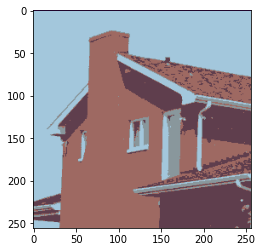

In [37]:
# 3. Design a filter for k-means algorithm, and apply it to the image.

#img = np.random.uniform(0,256,(30,30,3)).astype(np.uint8)
img = Image.open('Image/house.bmp')
img = np.array(img)
def kmeans(img, k):
    repeat = 1
    centriod = np.random.uniform(0,256,(k,3)).astype(np.uint8) 
    print('start')
    print(centriod)
    h,w = img.shape[:2]

    while True:
        print('number: ',repeat)   # 반복횟수 표시
        repeat+=1
        
        # groups
        groups = []
        # indexes
        indexes = []
        for d in range(k):
            groups.append([])
            indexes.append([])
        # 거리에 따라 group에 각 필셀 추가
        for i in range(h):
            for j in range(w):
                distances = np.array([])
                for d in range(k):
                    distances = np.append(distances, np.sum((img[i,j,:] - centriod[d])**2))
                idx=np.argmin(distances)
                groups[idx].append(img[i,j])
                indexes[idx].append([i,j])
        
        # 각 그룹의 평균값으로 다음 centriod 계산
        next_centriod = np.zeros((k,3),dtype='int')
        for d in range(k):
            next_centriod[d] = np.array(groups[d]).mean(axis=0)
        print(next_centriod)
        
        # 종료조건
        if(np.array_equal(centriod, next_centriod)):
            print('find!')
            break
        centriod = next_centriod
    
    # 각 그룹에 centriod값 할당
    for i in range(k):
        for j in range(len(indexes[i])):
            img[indexes[i][j][0],indexes[i][j][1],:]=centriod[i]

    return centriod, img

centriods, result_img = kmeans(img,5)
print(centriods)
plt.imshow(result_img)